In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Loading Data

In [ ]:
# WARNING - As the data file is large, a few checks are disabled
# during download. If in any DOUBTS, download data using your
# own security measures
! wget --no-check-certificate -r 'https://drive.google.com/uc?export=download&id=11t-eBwdXU9EWriDhyhFBuMqHYiQ4gdae' -O dogbreed

will be placed in the single file you specified.

--2023-10-29 03:25:35--  https://drive.google.com/uc?export=download&id=11t-eBwdXU9EWriDhyhFBuMqHYiQ4gdae
Resolving drive.google.com (drive.google.com)... 172.217.194.102, 172.217.194.100, 172.217.194.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.194.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dogbreed’

dogbreed                [ <=>                ]   2.24K  --.-KB/s    in 0s      

2023-10-29 03:25:35 (35.6 MB/s) - ‘dogbreed’ saved [2291]

Loading robots.txt; please ignore errors.
--2023-10-29 03:25:35--  https://drive.google.com/robots.txt
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘dogbreed’

dogbreed                [ <=>                ]     570  --.-KB/s    in 0s      

2023-10-29 03:25:36 (37.7 MB/s) - ‘dogbreed’ saved [570]

--2023-10-29 03

In [ ]:
# Extract file contents
!unzip dogbreed

Archive:  dogbreed
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of dogbreed or
        dogbreed.zip, and cannot find dogbreed.ZIP, period.


In [ ]:
import gdown
import zipfile

# Google Drive file ID for the zip file
file_id = '11t-eBwdXU9EWriDhyhFBuMqHYiQ4gdae'

# output file name
output_file = 'dog-breed-identification.zip'

# Download the file from Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Extract the contents of the zip file
with zipfile.ZipFile(output_file, 'r') as zip_ref:
    zip_ref.extractall()

print("Files have been successfully downloaded and extracted.")


Downloading...
From: https://drive.google.com/uc?id=11t-eBwdXU9EWriDhyhFBuMqHYiQ4gdae
To: /content/dog-breed-identification.zip
100%|██████████| 724M/724M [00:27<00:00, 26.5MB/s]


Files have been successfully downloaded and extracted.


In [ ]:
# Check the labels
import pandas as pd
labels_csv = pd.read_csv("/content/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Examine the table
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


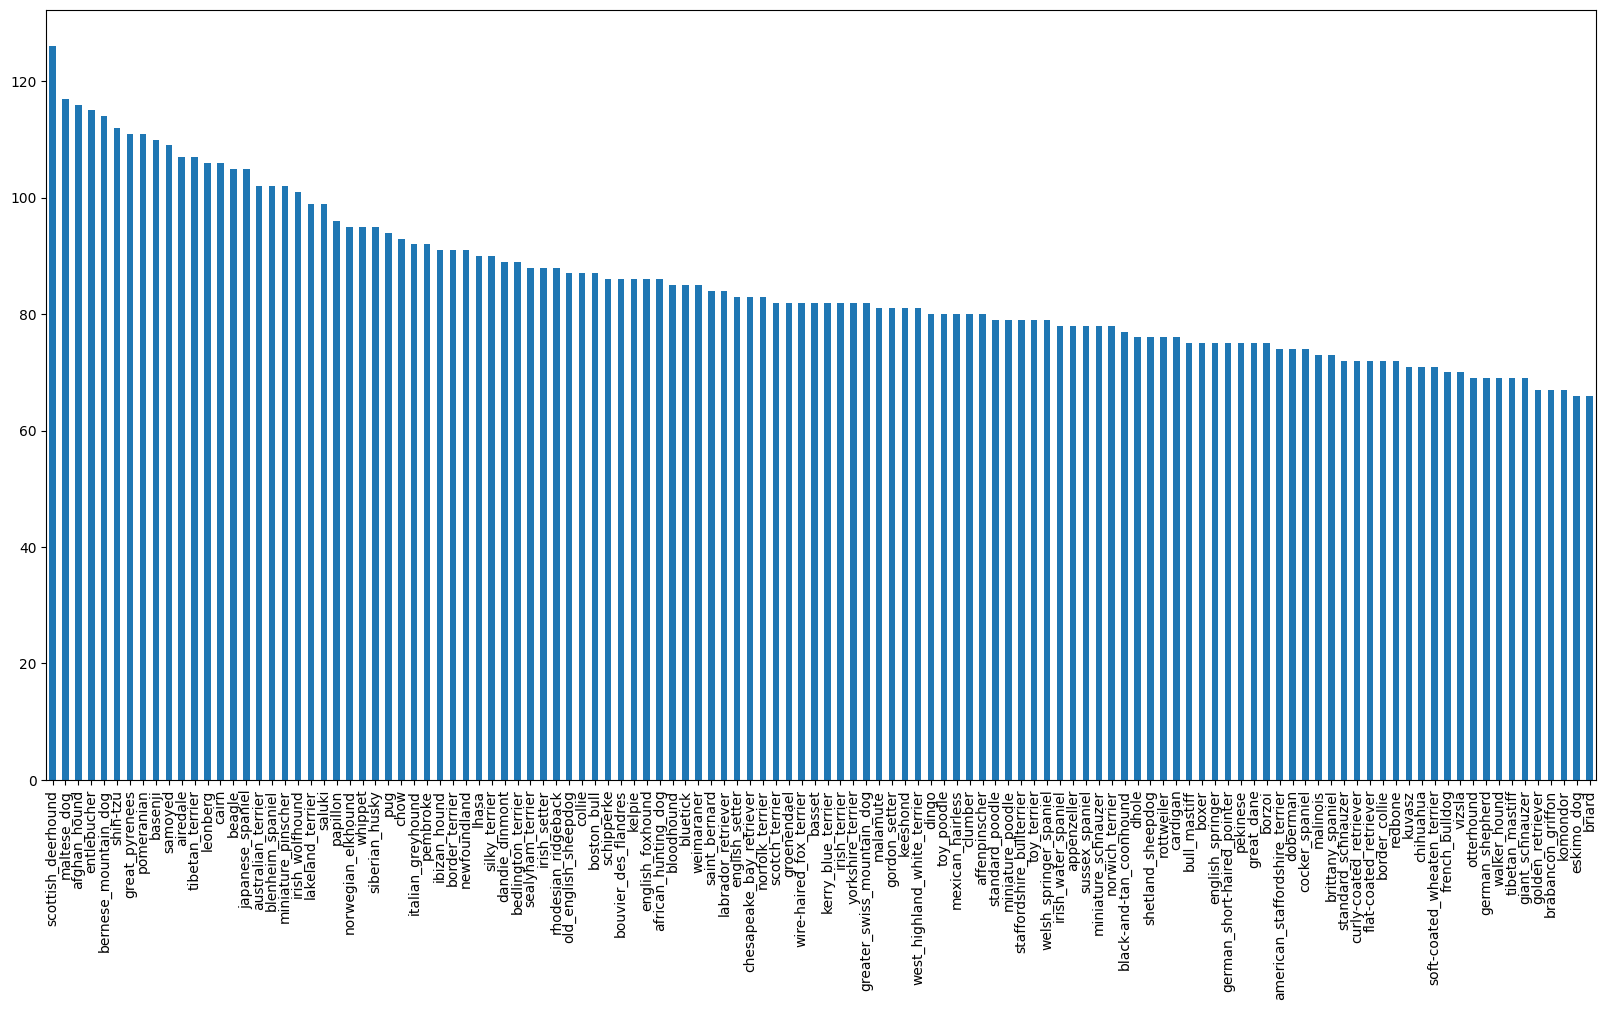

In [ ]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

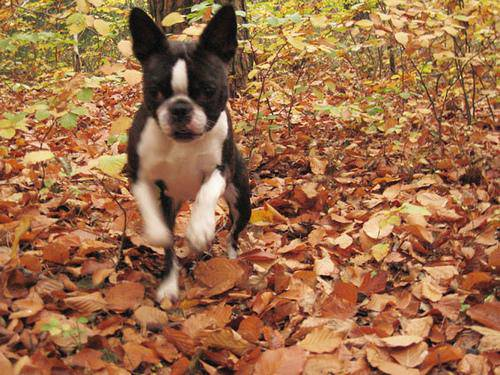

In [ ]:
# print sample image
from IPython.display import display, Image
Image("/content/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

# Setting up data paths

In [ ]:
# Define our training file path for ease of use
train_path = "/content/train"

In [ ]:
# Create pathnames from image ID's
filenames = [train_path + '/'+fname + ".jpg" for fname in labels_csv["id"]]

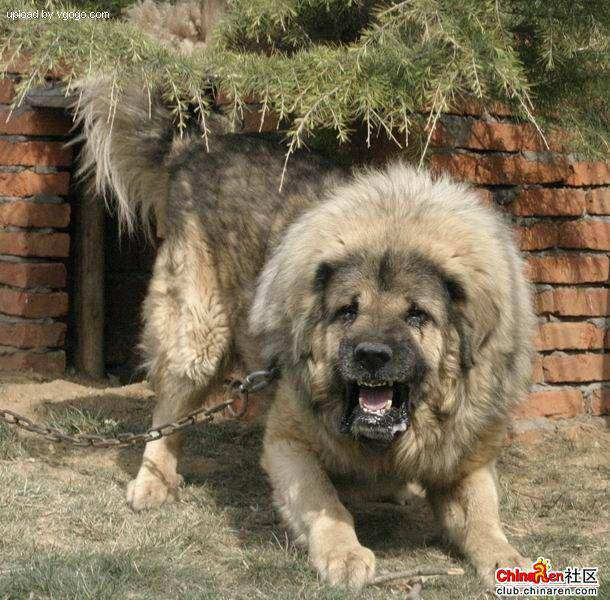

In [ ]:
# Check an image directly from a filepath
Image(filenames[9000])

In [ ]:
# Extract unique labels
import numpy as np
labels = labels_csv["breed"].to_numpy()
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# print categories
list(unique_breeds)

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [ ]:
# Encode target labels with values between 0 and 120
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder().fit_transform(labels).reshape(-1,1)
labels

array([[19],
       [37],
       [85],
       ...,
       [ 3],
       [75],
       [28]])

In [ ]:
# Use onehotencoding to convert categorical values
from sklearn.preprocessing import OneHotEncoder
boolean_labels = OneHotEncoder().fit_transform(labels).toarray()

In [ ]:
# Examine sample record
boolean_labels[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [ ]:
# Setup variables for featues and labels
X = filenames
y = boolean_labels

In [ ]:
# Create training/validation datasets
from sklearn.model_selection import train_test_split

# Split them into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing Images

In [ ]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

# Creating Batches of Data

In [ ]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y = None, batch_size = BATCH_SIZE, data_type = 1):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it
  if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we don't have labels
  if data_type == 3:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif data_type == 2:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function
    # is faster than shuffling images
    data = data.shuffle(buffer_size = len(x))

    # Create (image, label) tuples
    # (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

# Visualizing data batch

In [ ]:
# Function for viewing images in a data batch
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure (figsize = (10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn grid lines off
    plt.axis("off")

# Defining Model

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE,
                 model_url = MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # TensorFlow Hub layer
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # output layer
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

# Model Summary

In [ ]:
# Create a model and print its summary
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


# Creating Datasets

In [ ]:
# Create training dataset Tensor
train_data = create_data_batches(X_train, y_train)

Creating training data batches...


In [ ]:
# Create validation dataset Tensor
val_data=create_data_batches(X_val,y_val)

Creating training data batches...


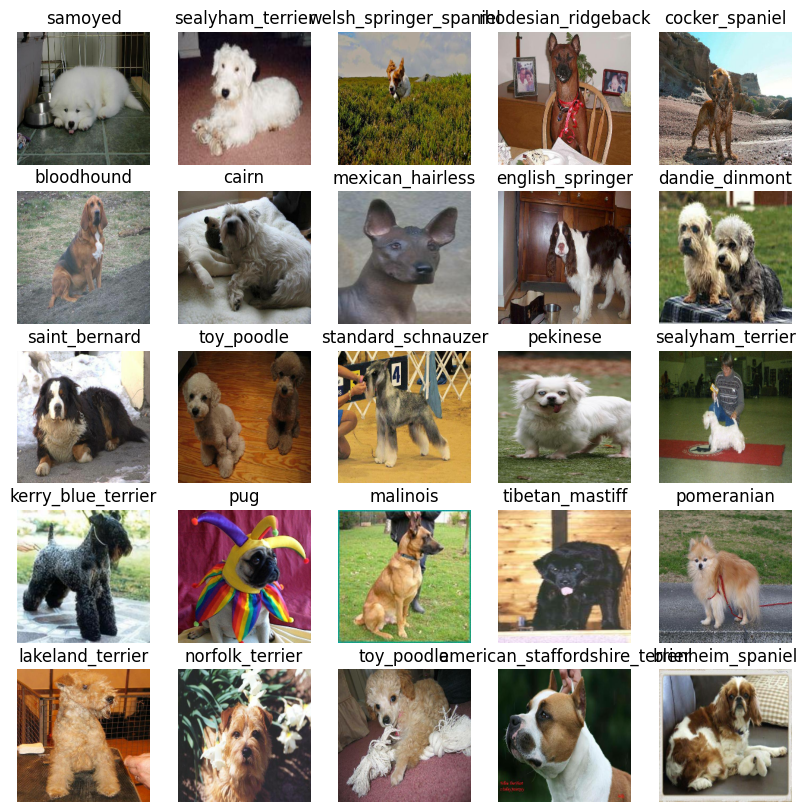

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

# Setting up TensorBoard

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
!rm -rf ./logs/  # cleaning the previous log

In [ ]:
import datetime
import os

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("logs",
                        # Timestamp the log
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# TensorBoard callback
model_tensorboard = create_tensorboard_callback()

# Early stopping callback
model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                        # stops after 3 rounds
                                                        # of no improvements
                                                             patience=3)

# Model Training

In [ ]:
# Construct model
model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
NUMBER_OF_EPOCHS = 100
model.fit(x = train_data,
               epochs = NUMBER_OF_EPOCHS,
               validation_data = val_data,
               callbacks = [model_tensorboard,
                            model_early_stopping])

Epoch 1/100
256/256 [==============================] - 36s 95ms/step - loss: 1.5016 - accuracy: 0.6346 - val_loss: 0.6991 - val_accuracy: 0.7858
Epoch 2/100
256/256 [==============================] - 18s 70ms/step - loss: 0.4113 - accuracy: 0.8841 - val_loss: 0.6462 - val_accuracy: 0.8044
Epoch 3/100
256/256 [==============================] - 18s 71ms/step - loss: 0.2326 - accuracy: 0.9419 - val_loss: 0.6425 - val_accuracy: 0.8064
Epoch 4/100
256/256 [==============================] - 20s 78ms/step - loss: 0.1481 - accuracy: 0.9698 - val_loss: 0.6447 - val_accuracy: 0.8103
Epoch 5/100
256/256 [==============================] - 26s 100ms/step - loss: 0.1002 - accuracy: 0.9831 - val_loss: 0.6578 - val_accuracy: 0.8044
Epoch 6/100
256/256 [==============================] - 20s 78ms/step - loss: 0.0732 - accuracy: 0.9897 - val_loss: 0.6604 - val_accuracy: 0.8088
Epoch 7/100
256/256 [==============================] - 19s 75ms/step - loss: 0.0550 - accuracy: 0.9943 - val_loss: 0.6852 - val_a

In [ ]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 4995), started 0:38:00 ago. (Use '!kill 4995' to kill it.)

<IPython.core.display.Javascript object>


# Evaluating Model Performance

In [ ]:
# Evaluate performance on validation data
model.evaluate(val_data)

64/64 [==============================] - 3s 54ms/step - loss: 0.8497 - accuracy: 0.8147


[0.8496946692466736, 0.8146699070930481]

# Predicting Images in Test Data

In [ ]:
# set up path to test images
test_path = "/content/test"
test_filenames = [test_path +'/'+ fname for fname in os.listdir(test_path)]
# prepare test dataset
test_data = create_data_batches(test_filenames, data_type = 3)

Creating test data batches...


In [ ]:
# Make predictions on test data
predictions = model.predict(test_data,
                                      verbose=1)

324/324 [==============================] - 20s 62ms/step


In [ ]:
# check how many images are tested?
predictions.shape

(10357, 120)

In [ ]:
# Print the predictions for first image
predictions[0]

array([8.43895407e-08, 7.11027460e-05, 9.57104021e-07, 5.09693407e-08,
       1.53755710e-08, 1.31747285e-07, 1.55167204e-08, 8.67484289e-08,
       1.48931383e-08, 5.19621846e-10, 1.37606326e-09, 3.82842700e-06,
       1.67674319e-08, 6.26403903e-07, 4.17430374e-06, 2.26143175e-08,
       6.11941368e-06, 7.77113662e-09, 9.82499216e-04, 5.94949112e-09,
       3.04742755e-08, 4.44556605e-08, 2.09228048e-08, 4.37676090e-06,
       2.00747749e-07, 1.52956254e-05, 7.37634096e-08, 5.59106120e-05,
       4.75704064e-06, 2.06983817e-08, 6.80628744e-08, 9.56008421e-07,
       1.99101578e-07, 1.53479734e-04, 6.75127524e-07, 1.37200260e-07,
       6.88390358e-08, 2.92701401e-07, 1.05465894e-07, 4.37746849e-07,
       7.74848922e-06, 1.06974949e-05, 2.42779038e-07, 2.28268476e-07,
       4.76853666e-06, 2.54154866e-08, 6.93733673e-05, 1.13752501e-08,
       1.44526541e-06, 2.83688896e-05, 2.92984737e-06, 3.53254563e-07,
       1.06500183e-05, 6.85095483e-06, 2.11328870e-06, 7.97788644e-08,
      

In [ ]:
# the max probability value predicted by the model
print(f"Max value: {np.max(predictions[0])}")
# the index where the max value in predictions[0] occurs
print(f"Max index: {np.argmax(predictions[0])}")
# the predicted label
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

Max value: 0.9946379065513611
Max index: 69
Predicted label: leonberg


# Visualizing Prediction Results

In [ ]:
# Function to plot image and the prediction
def plot_pred(prediction_probabilities, images):
  image = process_image(images)
  pred_label = unique_breeds[np.argmax(prediction_probabilities)]
  plt.imshow(image)
  plt.axis('off')
  plt.title(pred_label)

In [ ]:
# function to print bar chart of prdictions
def plot_pred_conf(prediction_probabilities):
  top_10_pred_indexes = prediction_probabilities.argsort()[-10:][::-1]
  top_10_pred_values = prediction_probabilities[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  top_plot[0].set_color("green")


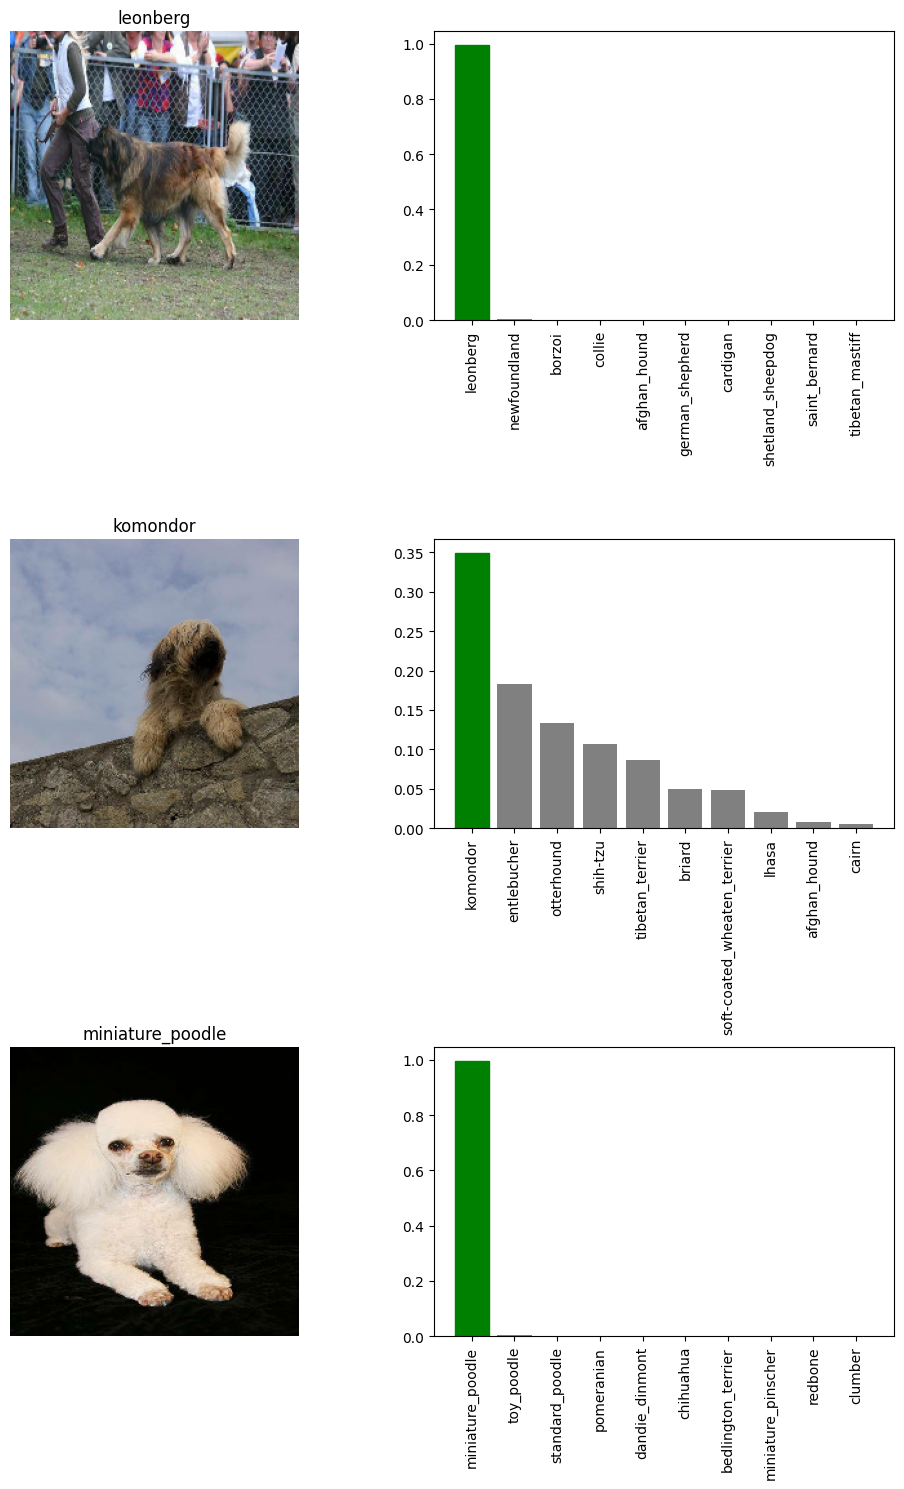

In [ ]:
# print results for first three predictions
num_rows = 3
plt.figure(figsize = (5 * 2, 5 * num_rows))
for i in range(num_rows):
  plt.subplot(num_rows, 2, 2*i+1)
  plot_pred(prediction_probabilities=predictions[i],
            images=test_filenames[i])

  plt.subplot(num_rows, 2, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions[i])
plt.tight_layout(h_pad=1.0)
plt.show()

# Predicting Unseen Image

In [ ]:
# download unseen image for testing
!pip install wget
url='https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/Ch04/tiger.jpg'

import wget
wget.download(url,'tiger.jpg')

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=a9307906fefccbc16f6a7483a925a92891b9c44be68f66c2a8a9d1ca1bb9f09c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'tiger.jpg'

In [ ]:
# preprocess the image and convert it to Tensor
data=create_data_batches(['/content/tiger.jpg'],batch_size=1,data_type=3)

Creating test data batches...


In [ ]:
# infer the image
result = model.predict(data)

1/1 [==============================] - 1s 588ms/step


In [ ]:
# get the prediction
predict_class_index = np.argmax(result[0],axis=-1)
predict_class_name = unique_breeds[(predict_class_index)]

In [ ]:
# get prediction proability
#result_proba = model.predict_proba(data,batch_size=None)

result_proba = model.predict(data, batch_size=None)

1/1 [==============================] - 0s 314ms/step


In [ ]:
# Check the threshold for prediction value
if result_proba.max() > 0.7:
  print(pred_label)
else:
  print('Not a dog breed as the predicted probability is {}'.format(result_proba.max()))

Not a dog breed as the predicted probability is 0.3377878665924072


# Training with Smaller Datasets

In [ ]:
# array to hold the evaluation results
model_performances = []

# function for training the given model on specified
# number of images
def train_model (model, NUM_IMAGES):
  model.fit(x=train_data,
               epochs=NUM_EPOCHS,
               validation_data=val_data,
               callbacks=[model_tensorboard,
                          model_early_stopping])

In [ ]:
# Training
NUM_EPOCHS = 100
# Create models and test for 1000,2000, 3000, 4000 images
for NUM_IMAGES in range(1000, 5000, 1000):
  model = create_model()
  x_train,x_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=10)
  train_data=create_data_batches(x_train,y_train,batch_size=10)
  val_data=create_data_batches(x_val,y_val,batch_size=10,data_type=2)
  train_model(model,NUM_IMAGES)
  model_performances.append(model.evaluate(val_data))

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Creating training data batches...
Creating validation data batches...
Epoch 1/100
25/25 [==============================] - 7s 112ms/step - loss: 4.6055 - accuracy: 0.0988 - val_loss: 3.3605 - val_accuracy: 0.2600
Epoch 2/100
25/25 [==============================] - 3s 105ms/step - loss: 1.6315 - accuracy: 0.6925 - val_loss: 2.1102 - val_accuracy: 0.4850
Epoch 3/100
25/25 [==============================] - 2s 71ms/step - loss: 0.5604 - accuracy: 0.9337 - val_loss: 1.6344 - val_accuracy: 0.5650
Epoch 4/100
25/25 [==============================] - 2s 68ms/step - loss: 0.2427 - accuracy: 0.9912 - val_loss: 1.4588 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 2s 71ms/step - loss: 0.1415 - accuracy: 1.0000 - val_loss: 1.3831 - val_accuracy: 0.6150
Epoch 6/100
25/25 [==============================] - 2s 73ms/step - loss: 0.0972 - accuracy: 1.0000 - val_loss: 1.3489 - val_

In [ ]:
model_performances

[[1.3005995750427246, 0.625],
 [0.8963910937309265, 0.737500011920929],
 [0.8184574842453003, 0.7749999761581421],
 [0.7909454107284546, 0.7724999785423279]]

In [ ]:
# load the metrics in pandas dataframe
import pandas as pd
comp = pd.DataFrame(model_performances,index = [1000,2000,3000,4000], columns = ['val_loss', 'val_acc'])


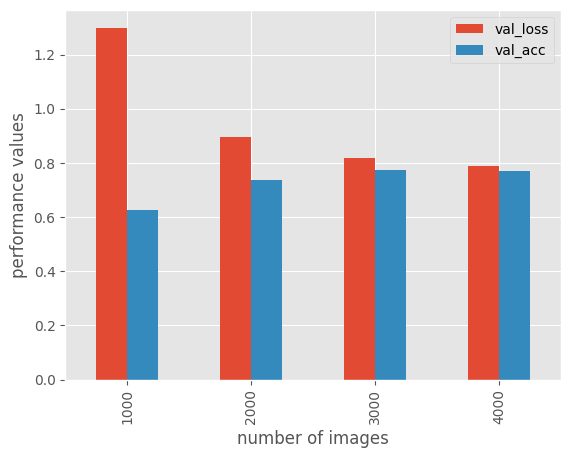

In [ ]:
# plot the table
import matplotlib.pyplot as plt
plt.style.use('ggplot')
comp.plot.bar()
plt.xlabel('number of images')
plt.ylabel('performance values')
plt.show()

# Saving and reloading a model

In [ ]:
# Saving model
model.save('model.h5') #saving the model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Loading model
from tensorflow.keras.models import load_model
model=load_model('model.h5',custom_objects={"KerasLayer":hub.KerasLayer})

In [ ]:
# Summary of loaded model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_5 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________
